In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [12]:
# Import raw csv file
file = 'Resources/statepoliciesbymodel.csv'
raw_df = pd.read_csv(file)
raw_df.head()

,state,statecode,year,time,makemodel,evtype,vehiclepurchaseincentive_dummy,vehiclepurchaseincentive_amount,homechargersubsidy_dummy,homechargersubsidy_amount,...,annualfee_dummy,annualfee_amount,annualfee_pvamount,tou_dummy,designatedparking_dummy,freeparking_dummy,Subsidies_excludinghov,Index_includinghov,Subsidies,Index
0,Alabama,AL,2010,2010h1,Bmw Active E,bev,0,0.0,0,0,...,0,0,0.0,0,0,0,0.0,0,0.0,0
1,Alabama,AL,2010,2010h1,Bmw I3,bev,0,0.0,0,0,...,0,0,0.0,0,0,0,0.0,0,0.0,0
2,Alabama,AL,2010,2010h1,Bmw I3REx,phev,0,0.0,0,0,...,0,0,0.0,0,0,0,0.0,0,0.0,0
3,Alabama,AL,2010,2010h1,Bmw I8,phev,0,0.0,0,0,...,0,0,0.0,0,0,0,0.0,0,0.0,0
4,Alabama,AL,2010,2010h1,Bmw X5,phev,0,0.0,0,0,...,0,0,0.0,0,0,0,0.0,0,0.0,0


In [65]:
states = raw_df['state'].unique()
purchase_incentive = []
useful_df = pd.DataFrame(columns = {'state','year','subsidies excluding hov','subsidies'})
# useful_df.append([{'state':'Colorado','year':'2010','incentive amount':2}])
for state in states:
    state_df = raw_df.loc[raw_df['state'] == state]
    years = state_df['year'].unique()
    for year in years:
        year_df = state_df.loc[state_df['year'] == year]
        subsidies_excludinghov = year_df['Subsidies_excludinghov'].sum()
        subsidies = year_df['Subsidies'].sum()
        yearly_df = pd.DataFrame([{'state':state,'year':year,'subsidies excluding hov':subsidies_excludinghov,'subsidies':subsidies}])
        useful_df = pd.concat([useful_df,yearly_df])
useful_df.set_index('state')

,year,subsidies,state,subsidies excluding hov
0,2010,0.0000,Alabama,0.0000
0,2011,0.0000,Alabama,0.0000
0,2012,0.0000,Alabama,0.0000
0,2013,0.0000,Alabama,0.0000
0,2014,0.0000,Alabama,0.0000
...,...,...,...,...
0,2011,0.0000,Wyoming,0.0000
0,2012,0.0000,Wyoming,0.0000
0,2013,0.0000,Wyoming,0.0000
0,2014,0.0000,Wyoming,0.0000


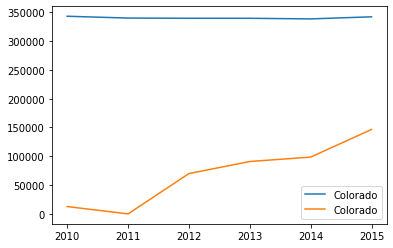

In [83]:
grouper_df = useful_df.groupby('state')
grouper_df.sum()
cali = useful_df.loc[useful_df['state'] == 'California']
colo = useful_df.loc[useful_df['state'] == 'Colorado']
plt.plot(cali['year'],cali['subsidies'])
plt.plot(colo['year'],colo['subsidies'])
plt.legend(colo['state'])

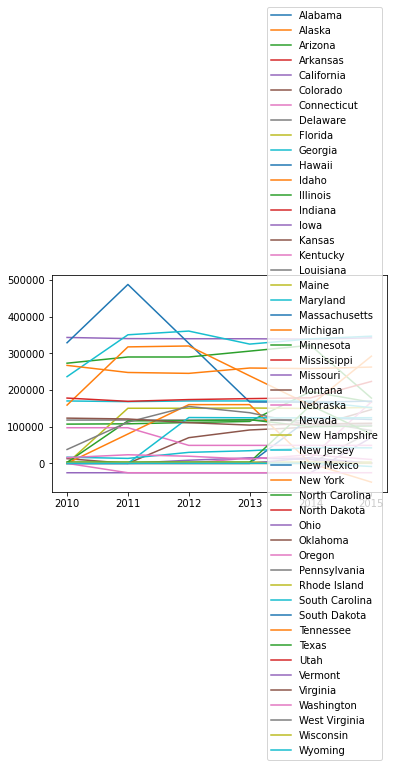

In [89]:
for state in states:
    state_df = useful_df.loc[useful_df['state'] == state]
    plt.plot(state_df['year'],state_df['subsidies'])
plt.legend(states,loc='right')